# Business Goal:

Arriving at a model to predict the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
bikeSharing = pd.read_csv(r'C:\Users\Sujatha\Desktop\Data Science\simple linear regression in python\Bike sharing\day.csv')
bikeSharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

# Inspect the various aspects of the bikeSharing dataframe

In [4]:
bikeSharing.shape

(730, 16)

In [5]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# percentage of missing values in each column
round(100*(bikeSharing.isnull().sum()/len(bikeSharing)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

No null/NA values identified

In [7]:
bikeSharing.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

# Data Preparation and Visualising

Identifying some predictors that directly have a strong association with the outcome variable

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# setting the style for seaborn plots
%matplotlib inline

# Drop unnessasary variables

instant - index variale, so it doest make any siginficance for model, so we will consider to drop

dteday - year ,month and weekday as separate columns, we can consider to drop

casual,registered = cnt, we will consider to drop casual,registered and treate "cnt" as target variable

In [9]:
#Dropping instant and dteday since they dont have significance with data
bikeSharing.drop(['instant','dteday','casual','registered'],inplace=True,axis=1)
bikeSharing.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

# Converting categarical variables

In [10]:
bikeSharing['season'] = bikeSharing['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})
bikeSharing['mnth'] = bikeSharing['mnth'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bikeSharing['weekday'] = bikeSharing['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bikeSharing['weathersit'] = bikeSharing['weathersit'].map({1:'Clear-Partlycloudy',2:'Mist-Cloudy',3:'LightSnow-lightRain-Thunderstorm',4:'HeavyRain-IcePallets-Thunderstorm'})

bikeSharing.head()

season  yr mnth  holiday    weekday  workingday          weathersit  \
0  spring   0  Jan        0     Monday           1         Mist-Cloudy   
1  spring   0  Jan        0    Tuesday           1         Mist-Cloudy   
2  spring   0  Jan        0  Wednesday           1  Clear-Partlycloudy   
3  spring   0  Jan        0   Thursday           1  Clear-Partlycloudy   
4  spring   0  Jan        0     Friday           1  Clear-Partlycloudy   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

In [11]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Visualising Categorical Variables

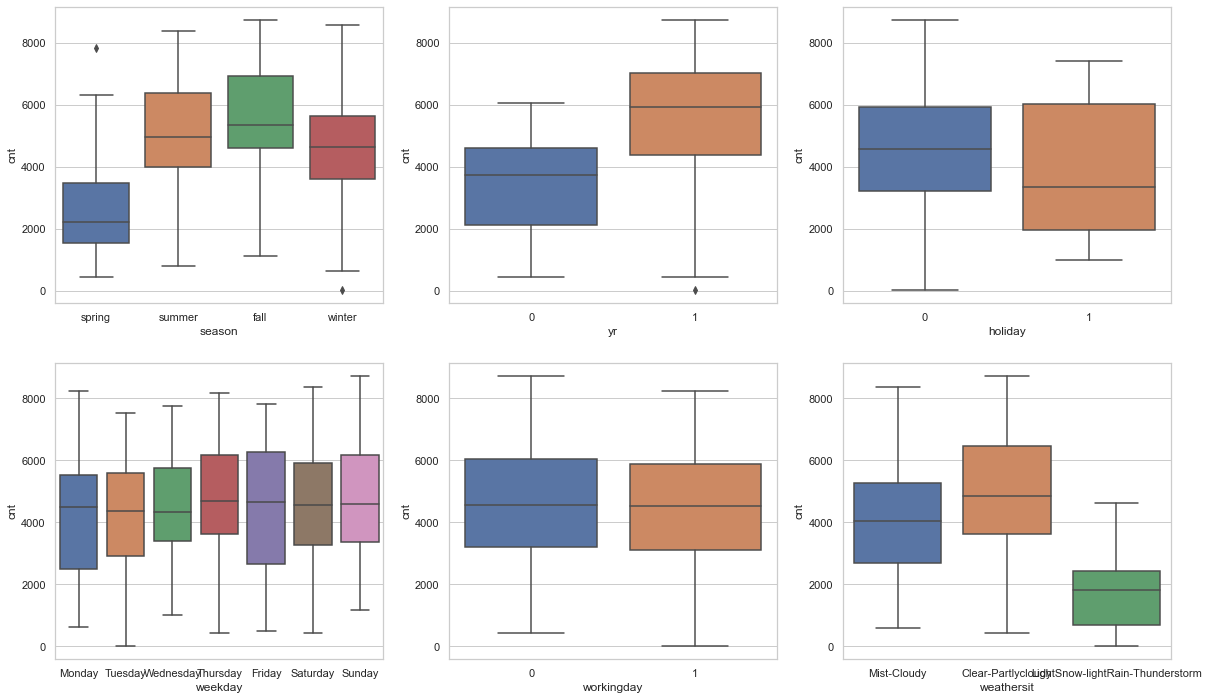

In [12]:
def boxplot_cat_var(cat_var,target):
    plt.figure(figsize=(20, 12))
    for i in range(0,len(cat_var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat_var[i], y = target, data = bikeSharing)
    plt.show()

cat_var =['season','yr','holiday','weekday','workingday','weathersit']
boxplot_cat_var(cat_var,'cnt')

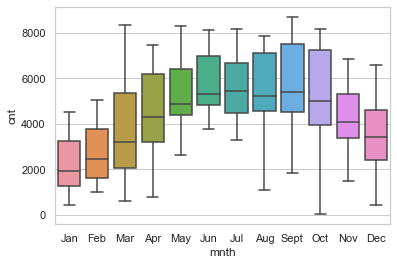

In [13]:
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing)

Observations:

season:
Almost 32% of the bike booking were happening in fall with a median of over 5000 booking (for the period of 2 years). This was followed by summer & winter with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable. 

yr:
Almost 99% of the bike booking were increased in year with median of close to previus year booking (for the period of 2 years). This indicates, yr can be a good predictor for the dependent variable 

weathersit:
Almost 67% of the bike booking were happening during ‘Clear-Partlycloudy with a median of close to 5000 booking (for the period of 2 years). This was followed by Mist-Cloudy with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable. 

holiday:
Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 

weekday:
weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not. 

workingday:
Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable 

mnth:
Almost 10% of the bike booking were happening in the months may,jun,jul,aug & sept with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.
    

# Dummy Variables

In [14]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the bikeSharing

bikeSharing = dummies('season',bikeSharing)
bikeSharing = dummies('mnth',bikeSharing)
bikeSharing = dummies('weekday',bikeSharing)
bikeSharing = dummies('weathersit',bikeSharing)
bikeSharing.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   spring  summer  ...  Oct  Sept  Monday  Saturday  Sunday  Thursday  \
0       1       0  ...    0     0       1         0       0         0   
1       1       0  ...    0     0       0         0       0         0   
2       1       0  ...    0     0       0         0       0         0   
3       1       0  ...    0     0       0         0       0         1   
4       1       0  ...    0     0       0         0       0         0   

   Tuesday  Wednesday  LightSnow-lightRain-Thunderstorm  Mist-Cloudy  
0        0          0                                 0            1  
1        1          0                                 0            1  
2        0          1                                 0            0  
3        0          0                                 0            0  
4        0          0                                 0            0  

[5 rows x 30 columns]

In [15]:
bikeSharing.shape

(730, 30)

In [16]:
bikeSharing.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.462641    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt      spring      summer  ...         Oct  \
count  730.000000   730.000000  730.000000  730.000000  ...  730.000000   
mean    12.763620  4508.006849    0.246575    0.252055  ...    0.084932   
std      5.195841  1936.011647    0.431313    0.434490  ...    0.278971   
min      1.500244    22.000000    0.000000    0.000000  ...    0.000000   
25%      9.041650  3169.750000    0.000000    0.000000  ...    0.000000   
50%     12.125325  4548.500000    0.000000    0.000000  ...    0.000000   
75%     15.625589  5966.000000    0.000000    1.000000  ...    0.000000   
max     34.000021  8714.000000    1.000000    1.000000  ...    1.000000   

             Sept      Monday    Saturday      Sunday    Thursday     Tuesday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.082192    0.143836    0.142466    0.142466    0.142466    0.143836   
std      0.274845    0.351164    0.349767    0.349767    0.349767    0.351164   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Wednesday  LightSnow-lightRain-Thunderstorm  Mist-Cloudy  
count  730.000000                        730.000000   730.000000  
mean     0.142466                          0.028767     0.336986  
std      0.349767                          0.167266     0.473004  
min      0.000000                          0.000000     0.000000  
25%      0.000000                          0.000000     0.000000  
50%      0.000000                          0.000000     0.000000  
75%      0.000000                          0.000000     1.000000  
max      1.000000                          1.000000     1.000000  

[8 rows x 30 columns]

The heatmap followed clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable and this mapping will be referred back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, (for identifying the correct variable to select/eliminate from the model).

# Model Building

# Assumptions

Linear relationship

Multivariate normality

No or little multicollinearity

No auto-correlation

Homoscedasticity

# Splitting the Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
df_train.shape

(510, 30)

In [19]:
df_test.shape

(219, 30)

Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

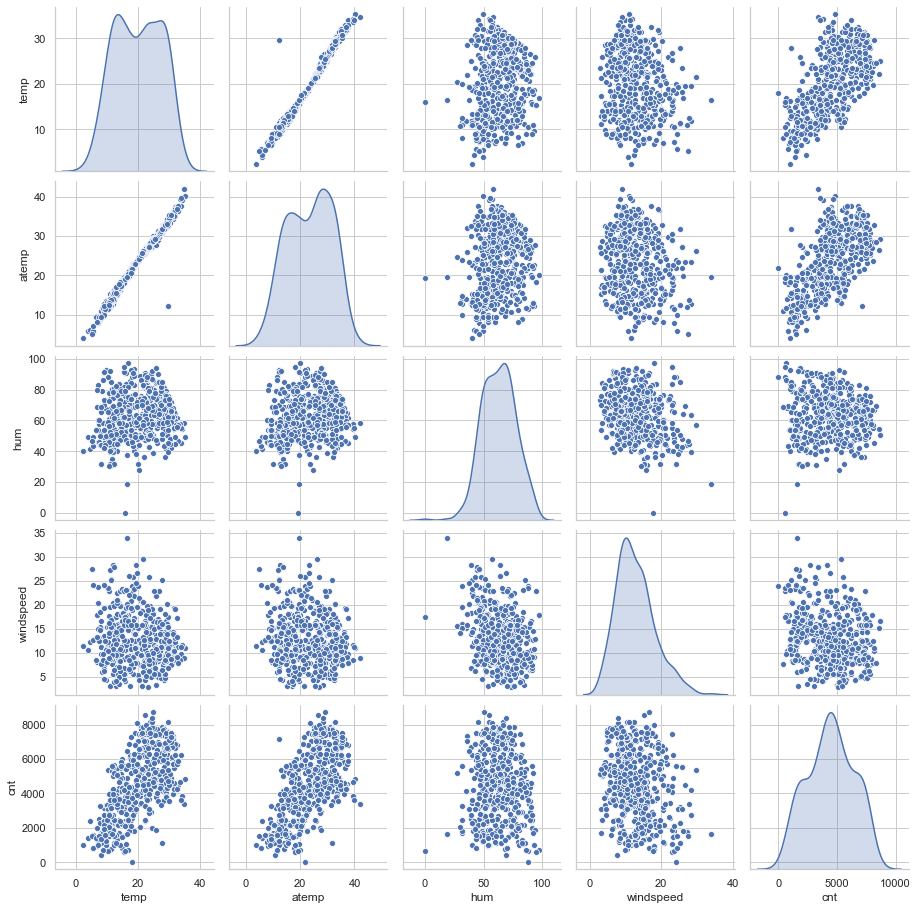

In [20]:
sns.pairplot(df_train[[ 'temp','atemp', 'hum', 'windspeed','cnt']],diag_kind='kde')
plt.show()

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt' , and both variables has close values, so, predicting the model to remove one variable

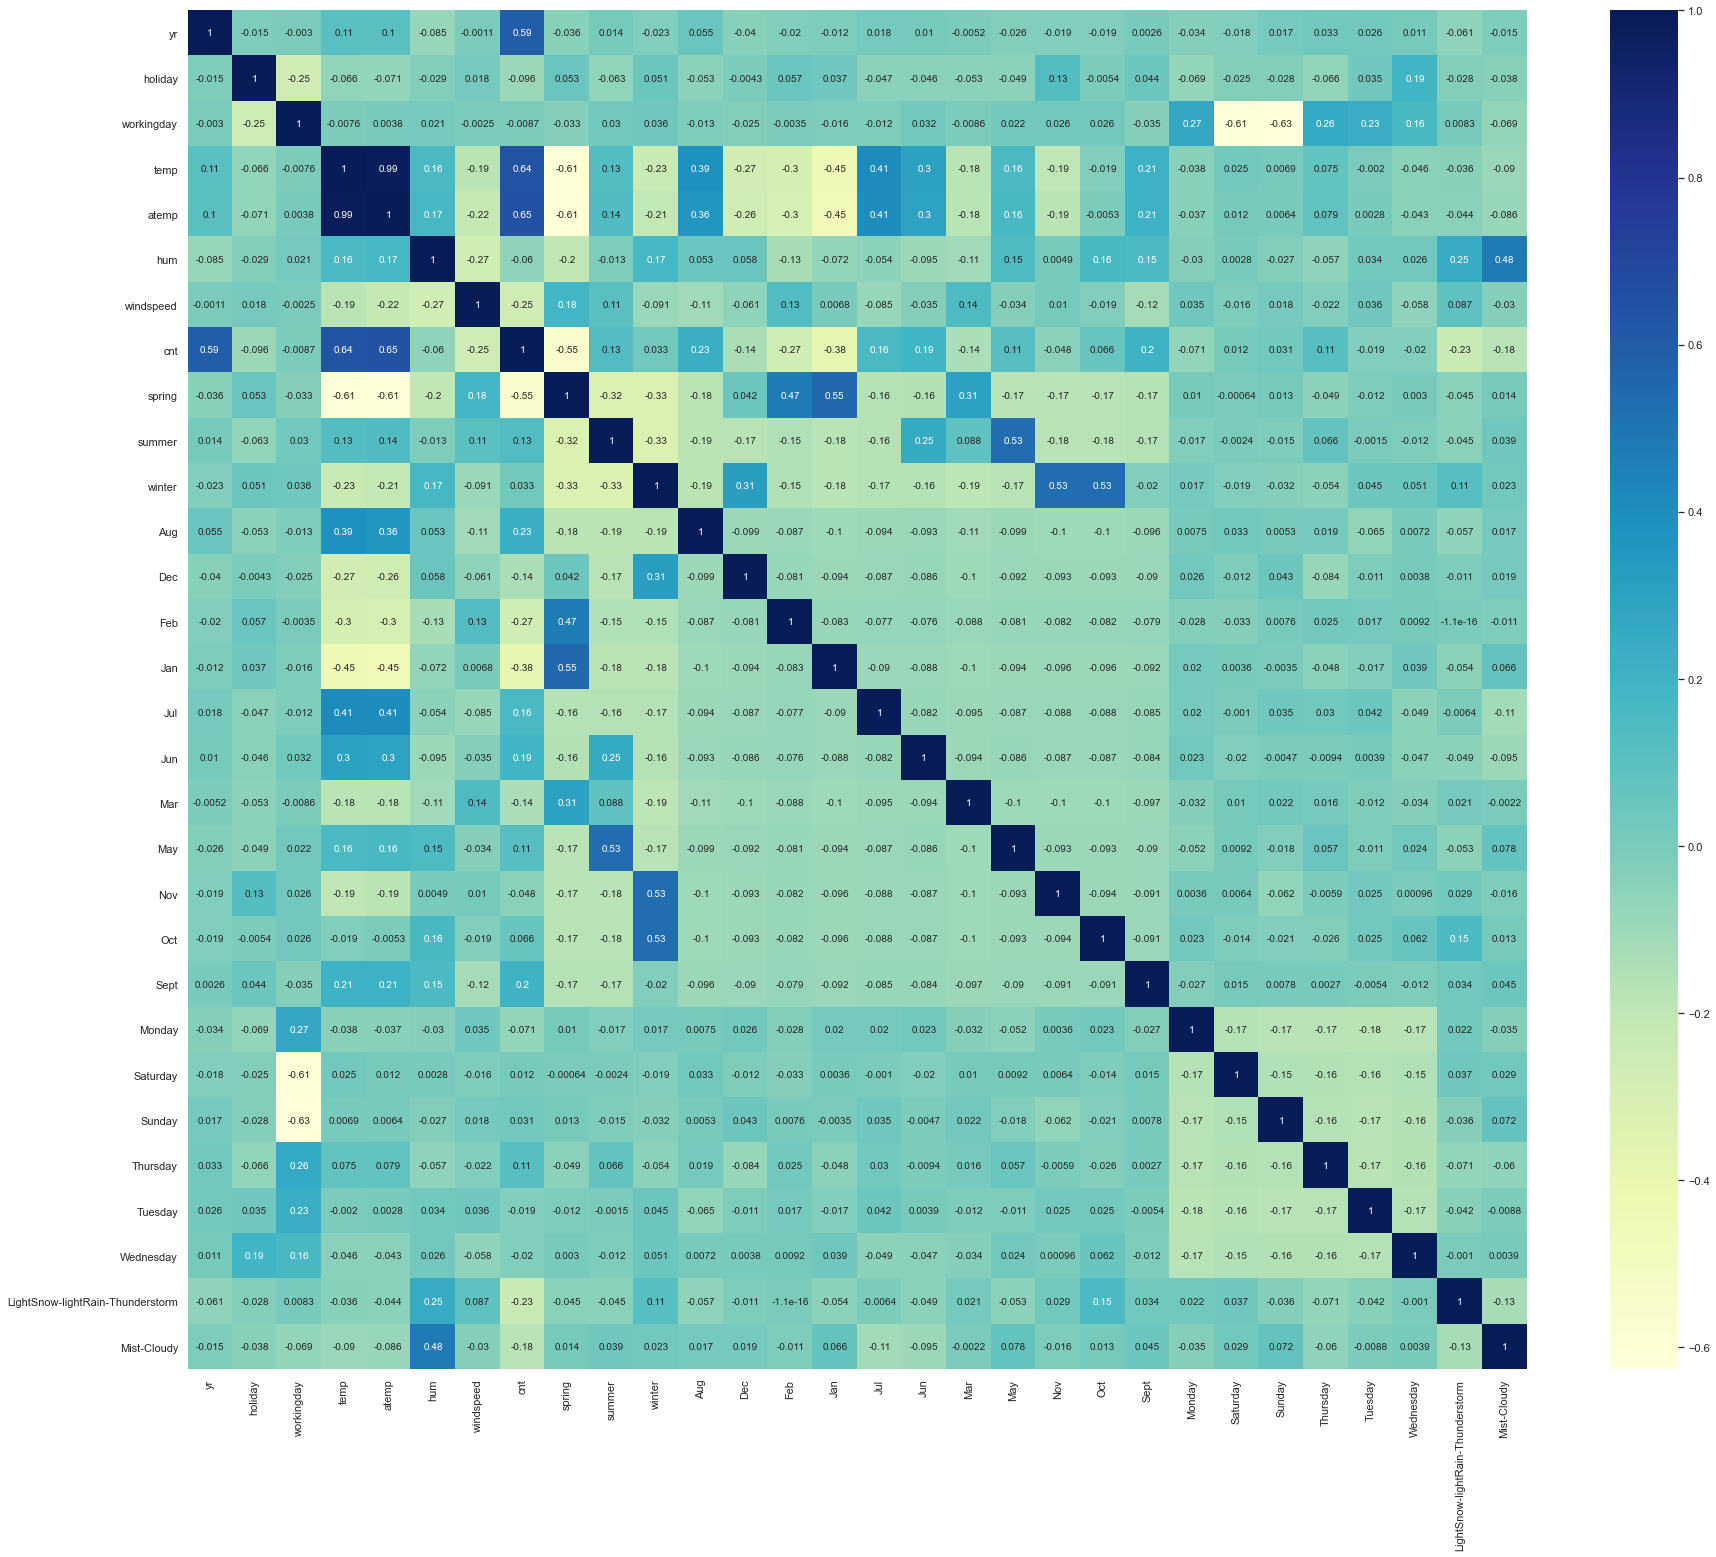

In [21]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observations:
The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# Rescaling the Features

We will use MinMax scaling.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  spring  summer  ...  Oct  Sept  Monday  Saturday  Sunday  \
653  0.864243       0       0  ...    1     0       0         0       0   
576  0.827658       0       0  ...    0     0       0         0       0   
426  0.465255       1       0  ...    0     0       0         0       1   
728  0.204096       1       0  ...    0     0       1         0       0   
482  0.482973       0       1  ...    0     0       0         0       1   

     Thursday  Tuesday  Wednesday  LightSnow-lightRain-Thunderstorm  \
653         0        0          1                                 0   
576         0        0          1                                 0   
426         0        0          0                                 0   
728         0        0          0                                 0   
482         0        0          0                                 0   

     Mist-Cloudy  
653            0  
576            0  
426            1  
728            0  
482            1  

[5 rows x 30 columns]

In [24]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.453386    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      spring      summer  ...         Oct  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.243137    0.245098  ...    0.086275   
std      0.169797    0.224593    0.429398    0.430568  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

             Sept      Monday    Saturday      Sunday    Thursday     Tuesday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.154902    0.129412    0.137255    0.143137    0.152941   
std      0.272166    0.362166    0.335985    0.344454    0.350557    0.360284   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Wednesday  LightSnow-lightRain-Thunderstorm  Mist-Cloudy  
count  510.000000                        510.000000   510.000000  
mean     0.135294                          0.029412     0.343137  
std      0.342373                          0.169124     0.475223  
min      0.000000                          0.000000     0.000000  
25%      0.000000                          0.000000     0.000000  
50%      0.000000                          0.000000     0.000000  
75%      0.000000                          0.000000     1.000000  
max      1.000000                          1.000000     1.000000  

[8 rows x 30 columns]

# Dividing into X and Y sets for the model building

In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

# RFE

Recursive feature elimination

In [26]:
#importing libs for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('LightSnow-lightRain-Thunderstorm', True, 1),
 ('Mist-Cloudy', True, 1)]

In [29]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sept',
       'LightSnow-lightRain-Thunderstorm', 'Mist-Cloudy'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [31]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

yr  holiday      temp       hum  windspeed  spring  summer  winter  Dec  \
653   1        0  0.509887  0.575354   0.300794       0       0       1    0   
576   1        0  0.815169  0.725633   0.264686       0       0       0    0   
426   1        0  0.442393  0.640189   0.255342       1       0       0    0   
728   1        0  0.245101  0.498067   0.663106       1       0       0    1   
482   1        0  0.395666  0.504508   0.188475       0       1       0    0   

     Jan  Jul  Nov  Sept  LightSnow-lightRain-Thunderstorm  Mist-Cloudy  
653    0    0    0     0                                 0            0  
576    0    1    0     0                                 0            0  
426    0    0    0     0                                 0            1  
728    0    0    0     0                                 0            0  
482    0    0    0     0                                 0            1

In [32]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# MODEL 1

In [33]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          3.34e-189
Time:                        14:11:54   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

p-values from above model seems to be lower than the significance value of 0.05

In [34]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

Features    VIF
0                              const  82.48
6                             spring   5.27
3                               temp   4.42
8                             winter   3.83
7                             summer   2.76
4                                hum   1.93
12                               Nov   1.76
10                               Jan   1.68
15                       Mist-Cloudy   1.57
9                                Dec   1.49
11                               Jul   1.49
13                              Sept   1.34
14  LightSnow-lightRain-Thunderstorm   1.26
5                          windspeed   1.21
1                                 yr   1.04
2                            holiday   1.03

spring has high VIF and p value, so we will consider to drop

In [35]:
X_train_new=X_train_new.drop(["spring"], axis = 1)

# MODEL 2

In [36]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          1.54e-188
Time:                        14:22:29   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Nov has high P value comparativly, we will consider to drop

In [37]:
X_train_new=X_train_new.drop(["Nov"], axis = 1)

# MODEL 3

In [38]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          4.25e-189
Time:                        14:26:25   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Dec has high P value comparativly, we will consider to drop

In [39]:
X_train_new=X_train_new.drop(["Dec"], axis = 1)

# MODEL 4

In [40]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          6.03e-190
Time:                        14:29:00   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [41]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

Features    VIF
0                              const  49.60
3                               temp   2.06
4                                hum   1.88
8                                Jan   1.55
12                       Mist-Cloudy   1.55
7                             winter   1.53
9                                Jul   1.43
6                             summer   1.41
11  LightSnow-lightRain-Thunderstorm   1.24
5                          windspeed   1.19
10                              Sept   1.19
1                                 yr   1.03
2                            holiday   1.02

temp has high VIF and p value, so we will consider to drop

In [42]:
X_train_new=X_train_new.drop(["temp"], axis = 1)

# MODEL 5

In [43]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     96.69
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          5.58e-116
Time:                        14:32:59   Log-Likelihood:                 329.95
No. Observations:                 510   AIC:                            -635.9
Df Residuals:                     498   BIC:                            -585.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

p-value of hum(humidity) seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables

In [44]:
X_train_new=X_train_new.drop(["hum"], axis = 1)

# MODEL 6

In [45]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     106.4
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          7.45e-117
Time:                        14:36:10   Log-Likelihood:                 329.59
No. Observations:                 510   AIC:                            -637.2
Df Residuals:                     499   BIC:                            -590.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [46]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

Features   VIF
0                              const  9.27
4                             summer  1.40
5                             winter  1.37
6                                Jan  1.20
7                                Jul  1.19
8                               Sept  1.12
3                          windspeed  1.05
9   LightSnow-lightRain-Thunderstorm  1.05
10                       Mist-Cloudy  1.04
1                                 yr  1.01
2                            holiday  1.01

We can see P values 0 and VIF less than 2, now checking for correlation between remaining varibales

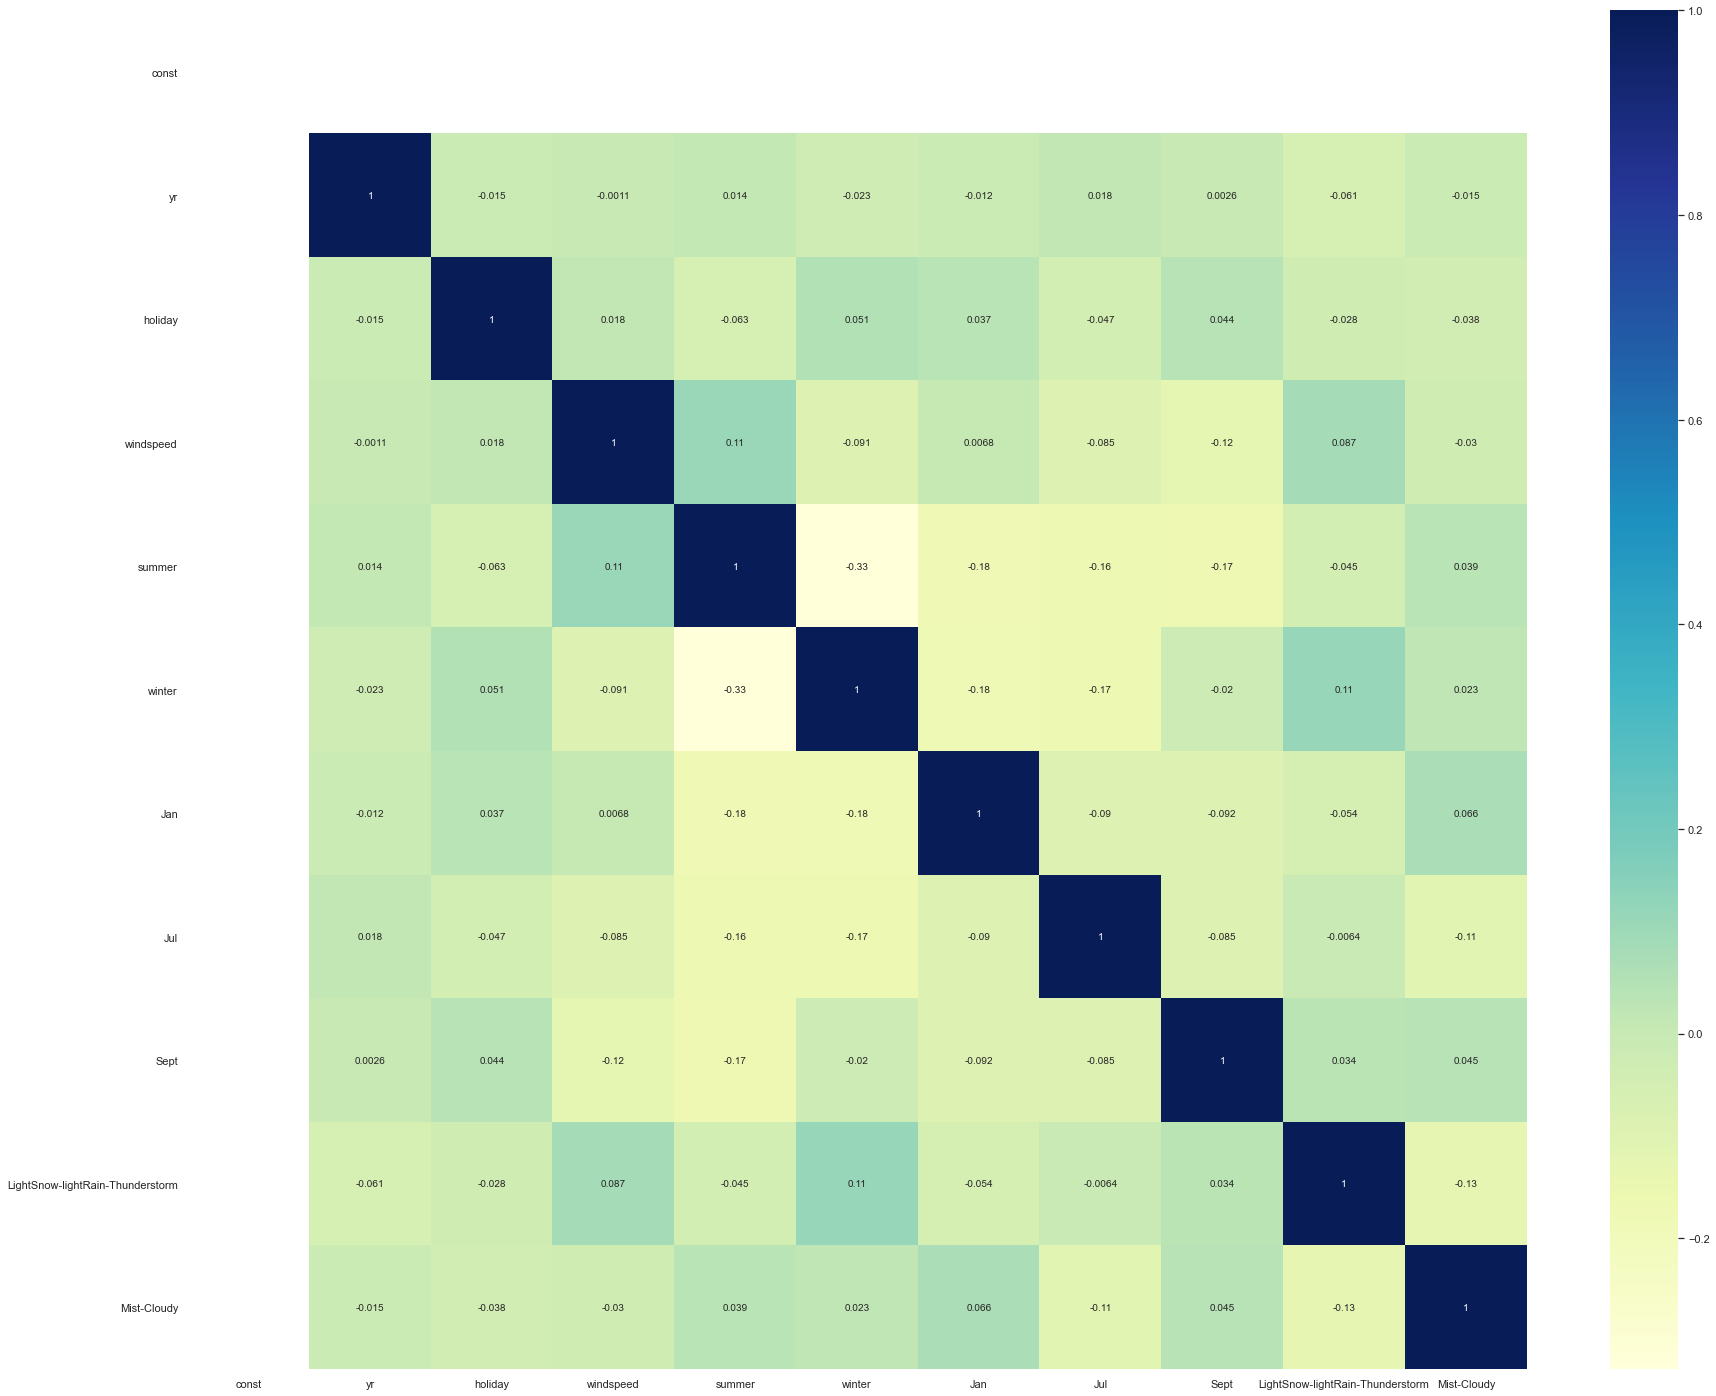

In [47]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

from above, summer and winter high negative correlation value

In [48]:
X_train_new=X_train_new.drop(["winter"], axis = 1)

# MODEL 7

In [49]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     114.7
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          1.36e-115
Time:                        14:47:46   Log-Likelihood:                 324.13
No. Observations:                 510   AIC:                            -628.3
Df Residuals:                     500   BIC:                            -585.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [51]:
X_train_new=X_train_new.drop(["summer"], axis = 1)

# MODEL 8

In [52]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     119.8
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          3.92e-111
Time:                        14:49:50   Log-Likelihood:                 311.09
No. Observations:                 510   AIC:                            -604.2
Df Residuals:                     501   BIC:                            -566.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [53]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

Features   VIF
0                             const  7.01
5                               Jul  1.04
6                              Sept  1.04
8                       Mist-Cloudy  1.04
3                         windspeed  1.03
4                               Jan  1.03
7  LightSnow-lightRain-Thunderstorm  1.03
2                           holiday  1.01
1                                yr  1.00

# Observations

Model looks perfect with 8 variables and R-squared - 0.657 , Adj. R-squared - 0.651

VIF less than 2

P values - 0

Prob (F-statistic) - almost equal to - 0

# Residual Analysis of Model

In [54]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_cnt= lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

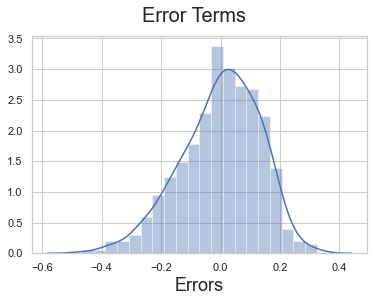

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled

# Prediction and Evaluation

In [56]:
#Scaling the test set
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

# Dividing the testset into X and Y sets for the model building

In [57]:
#Dividing into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [59]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Evaluation of test via comparison of y_pred and y_test

In [60]:
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_pred)
print(r2)

0.4859465982541896


Adjusted R^2 Value for TEST

In [61]:
X_test_new.shape

(219, 9)

In [62]:
# We already have the value of R^2 (calculated in above step)
# n is number of rows in X
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.463810327365614

Text(0, 0.5, 'y_pred')

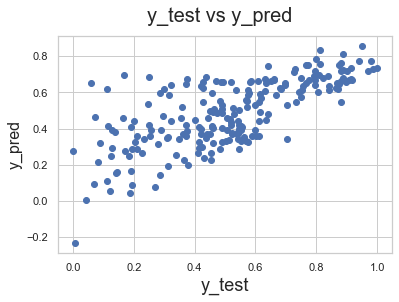

In [63]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

# Final Results

Train R^2 :0.657
    
Train Adjusted R^2 :0.651
    
Test R^2 :0.485
    
Test Adjusted R^2 :0.463 #### This seems to be a really good model that can be very well 'Generalized' 

In [64]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     119.8
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          3.92e-111
Time:                        15:07:30   Log-Likelihood:                 311.09
No. Observations:                 510   AIC:                            -604.2
Df Residuals:                     501   BIC:                            -566.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#equation of best fitted line is:

cnt= 0.5201+0.2547 yr-0.1245 holiday-0.2741 windspeed-0.2717 Jan+0.0741 Jul+0.1402 Sept-0.2960 LightSnow-lightRain-Thunderstorm-0.0847 Mist-Cloudy

# Hypothesis Testing

Hypothesis testing states that:
    
H0:B1=B2=...=Bn=0
    
H1: at least one Bi!=0

From the final model summary, it is evident that all the coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS

#Analysing the above model, the comapny should focus on the following features:
    
year: The company should encounter an increase in the number of users when the situation comes back to normal as compared to 2019.

holiday: The company should focus on expanding it's business during holidays

weather: The users prefer to rent a bike when the weather is pleasant i.e. either light snow or mist cloudy.

mnth: The users prefer to ride or rent a bike during the months of jan, jul & sep.

windspeed: The users prefer to ride or rent a bike when there is enjoyable windspeed

Hence when the situation comes back to normal, the company should face an increase in the business as compared to 2019 and should expand it's business with new availing offers or schemes during holidays and in the months of jan, jul & sep when the weather is pleasant with clear sky and moderate temperature with good windspeed.